<a href="https://colab.research.google.com/github/amrios80/data-analysis-airbnb/blob/master/airbnb/eda_amrios80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 1 (EDA)

MINE-4101: Applied Data Science  
Univerisdad de los Andes  
  
**Dataset:** : (1) la lista
de más de 900 celulares publicados a la fecha en la plataforma, (2) todo el detalle de cada
uno de los celulares de esta lista, y (3) la información básica de los diferentes vendedores.


**Business Context:** Mamá no es muy tecnológica por lo que no hay necesidad de regalarle un celular de gama
alta. Probablemente un celular de máximo $1.200.000 sea más que suficiente, aunque si
lo puedo pagar a cuotas mucho mejor 😅. Además de que las características del celular
como la marca, el color, el tamaño de la pantalla, entre otras, sean las ideales para ella,
siempre me gusta revisar que el vendedor tenga buena reputación (ojalá que sea una
tienda oficial), que ofrezca garantía de al menos 6 meses y que el envío sea gratis 😁. Su
cumpleaños es muy pronto así que lo mejor es que el vendedor esté en los alrededores
de Bogotá para que el envío sea rápido. Para propósitos del ejercicio, lo anterior no debe
considerarse como restricciones estrictas sino más bien como características o
condiciones de compra deseadas.

**Restricciones:**
-precio <= 1200000
-preferible a cuotas
-marca, color, tamano de pantalla ideal para mama.  
-vendedor con buena reputacion.
-preferible tienda oficial
-garantia >= 6 meses
-envio gratis.
-alrededores de bogota.


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# **1. Reporte de calidad y preparacion de los datos **

1.1. Cargue de los datasets: Se comprimen los dos mas grandes y se suben todos a un repositorio publico en github. Los archivos son .json, por lo cual se usa la funcion de pandas para la lectura de json.

In [78]:
items_url="https://github.com/amrios80/eda-jobs/raw/refs/heads/main/parcial1/items.json.gz"
search_url="https://github.com/amrios80/eda-jobs/raw/refs/heads/main/parcial1/search_results.json.gz"
sellers_url="https://github.com/amrios80/eda-jobs/raw/refs/heads/main/parcial1/sellers.json"

# Loading the datasets
items_df = pd.read_json(items_url, compression='gzip')
search_df=pd.read_json(search_url, compression="gzip")
sellers_df=pd.read_json(sellers_url)

1.2. Revision de dimensiones de los datasets. Se observa que items y search contienen el mismo numero de filas. Se determina que se deben unir los tres en un solo dataframe

In [105]:
print("dimensiones items:",items_df.shape)
print("dimensiones search:",search_df.shape)
print("dimensiones sellers:",sellers_df.shape)

dimensiones items: (984, 45)
dimensiones search: (984, 40)
dimensiones sellers: (212, 11)


1.3. Preparacion de datos.

Se requiere tener la data para revisar las condiciones:

*   Precio < 1200000
*   Preferible a cuotas
*   Marca, color, pantalla ideal para madres
*   Preferible tienda oficial
*   Garantia >=6 meses
*   Envio gratis
*   En los alrededores de bogota
*   Buena reputacion del vendedor

Por esto se debe buscar en los datasets de los celulares: precio, marca, memoria, color, ram, screen, color, sistema_operativo, meses_de_garantia, pago_cuotas, tienda_oficial, entrega_gratuita,
de vendedor: ciudad/departamento, reputacion.


In [ ]:
1.3.1. Peparacion Dataset items:

In [106]:
import re
cols=["id","seller_id","official_store_id","price","warranty","accepts_mercadopago","non_mercado_pago_payment_methods","seller_address","condition", "shipping","sale_terms","attributes"]
part3_items=items_df[cols]
part3_items.columns=["item_id","seller_id","official_store_id","item_price","warranty","accepts_mercadopago","non_mercado_pago_payment_methods","seller_address","condition", "shipping","sale_terms","item_attributes"]

#Lambdas para extraer data del campo json atributos
def  find_brand( tokens ):
  for i in tokens:
    if i["id"]=="BRAND":
      return i["value_name"]
  return None

def find_internal_memory(tokens):
  for i in tokens:
    if i["id"]=="INTERNAL_MEMORY":
      return i["value_name"]
  return None

def find_screen_size(tokens):
  for i in tokens:
    if i["id"]=="SCREEN_SIZE":
      return i["value_name"]
  return None

def find_color(tokens):
  for i in tokens:
    if i["id"]=="COLOR":
      return i["value_name"]
  return None

def find_ram(tokens):
  for i in tokens:
    if i["id"]=="RAM":
      return i["value_name"]
  return None

def find_os(tokens):
  for i in tokens:
    if i["id"]=='OPERATING_SYSTEM_NAME':
      return i["value_name"]
  return None

#extraccion del numero de meses de garantia
def extract_months(data_line):
    # Regular expression to capture the number and the unit (años, meses, días)
    match = re.search(r'(\d+)\s*(años|meses|días)', str(data_line))
    if match:
        number = int(match.group(1))
        unit = match.group(2)
        # Convert the warranty period to months
        if unit == 'años':
            return number * 12
        elif unit == 'meses':
            return number
        elif unit == 'días':
            return round(number / 30)  # Approximate conversion of days to months
    return None

part3_items["warranty_months"]= part3_items['warranty'].apply(lambda x: extract_months(x) )
part3_items["internal_memory"]= part3_items['item_attributes'].apply(lambda x: find_internal_memory(x) )
part3_items["screen_size"]= part3_items['item_attributes'].apply(lambda x: find_screen_size(x) )
part3_items["color"]= part3_items['item_attributes'].apply(lambda x: find_color(x) )
part3_items["ram"]= part3_items['item_attributes'].apply(lambda x: find_ram(x) )
part3_items["brand"]= part3_items['item_attributes'].apply( lambda x: find_brand(x) )
part3_items["os"]= part3_items['item_attributes'].apply( lambda x: find_os(x) )


<ipython-input-106-9ca9e185a858>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part3_items["warranty_months"]= part3_items['warranty'].apply(lambda x: extract_months(x) )
<ipython-input-106-9ca9e185a858>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part3_items["internal_memory"]= part3_items['item_attributes'].apply(lambda x: find_internal_memory(x) )
<ipython-input-106-9ca9e185a858>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

1.3.2. Preparacion dataset sellers

In [107]:
sellers_df["address_state"]= sellers_df['address'].apply(lambda x: x['state'])
sellers_df["seller_reputation_level_id"]= sellers_df['seller_reputation'].apply(lambda x: x['level_id'])

cols=["id","address_state","seller_reputation_level_id"]
part2_sellers=sellers_df[cols]
part2_sellers.columns=["seller_id","address_state","seller_reputation_level_id"]

1.3.3. Preparacion dataset search

In [109]:
search_df["seller_id"]= search_df['seller'].apply(lambda x: x['id'])
search_df["free_shipping"]= search_df['shipping'].apply(lambda x: x['free_shipping'])
search_df["installments_quantity"]= search_df['installments'].apply(lambda x: x['quantity'])
search_df["installments_amount"]= search_df['installments'].apply(lambda x: x['amount'])

cols=["id","price","installments_quantity","installments_amount","free_shipping","seller_id","sanitized_title","attributes"]
part1_search=search_df[ cols ]
part1_search.columns=["item_id","price","installments_quantity","installments_amount","free_shipping","seller_id","sanitized_title","search_attributes"]

1.3.4. Union de los datasets en el dataset total

In [100]:
total=part1_search.merge(part2_sellers, on="seller_id", how="left")
total=total.merge(part3_items, on="item_id", how="left")

In [111]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   item_id                           984 non-null    object 
 1   price                             984 non-null    float64
 2   installments_quantity             984 non-null    int64  
 3   installments_amount               984 non-null    float64
 4   free_shipping                     984 non-null    bool   
 5   seller_id_x                       984 non-null    int64  
 6   sanitized_title                   984 non-null    object 
 7   search_attributes                 984 non-null    object 
 8   address_state                     984 non-null    object 
 9   seller_reputation_level_id        980 non-null    object 
 10  seller_id_y                       984 non-null    int64  
 11  official_store_id                 85 non-null     float64
 12  item_pri

In [110]:
total.shape
#984,17)

(984, 28)

# **2. Analisis exploratorio de las variables mas relevantes**

El dataset está compuesto por 7888 filas y 75 columnas, hay 21 columnas con tipo float64, 19 tipo int64 y 35 tipo object. Teniendo en cuenta que el objetivo del analisis es recomendar el mejor sector para inversion inmobiliaria en la ciudad de San Francisco (California), de que manera que se pueda asegur una alta tasa de ocupación, un precio por noche justo y un buen sistema de atención, las 5 variables que se utilizaran para el analsis son: price, availability_365, neighbourhood_cleansed, review_scores_overall y property_type.

VARIABLES NUMERICAS
*  Discretas: availability_365
*  Continuas: Price, review_scores_value


VARIABLES CATEGORICAS
*   Nominales: neighbourhood_cleansed
*   Ordinales: property_type







In [ ]:
# Showing dataframe dimensions
listings_df.shape

(7888, 75)

In [ ]:
# Showing column types
listings_df.dtypes

,0
id,int64
listing_url,object
scrape_id,int64
last_scraped,object
source,object
name,object
description,object
neighborhood_overview,object
picture_url,object
host_id,int64


In [ ]:
listings_df.sample(3) # Showing a sample of n rows

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
4374,13299858,https://www.airbnb.com/rooms/13299858,20240604143925,2024-06-04,city scrape,"Business Travelers Often Say, Best Airbnb They...",San Francisco Short-term rental registration n...,The house lies at the north end of Mission Dis...,https://a0.muscache.com/pictures/bcf99786-4905...,7630810,https://www.airbnb.com/users/show/7630810,Michael,2013-07-21,NaN,I'm happy to answer any questions and give adv...,within an hour,100%,96%,t,https://a0.muscache.com/im/pictures/user/aab39...,https://a0.muscache.com/im/pictures/user/aab39...,Mission District,6,7,"['email', 'phone']",t,t,Neighborhood highlights,Mission,NaN,37.77061,-122.42416,Entire rental unit,Entire home/apt,1,1.0,1 bath,1.0,1.0,"[""Freezer"", ""Outdoor furniture"", ""Usually Pant...",$285.00,2,22,2.0,3.0,7.0,1125.0,2.1,1028.4,NaN,t,3,6,22,34,2024-06-04,92,8,0,2016-06-24,2023-10-29,4.98,4.97,4.97,5.00,5.00,4.90,4.78,STR-0005215,f,3,3,0,0,0.95
2971,4896087,https://www.airbnb.com/rooms/4896087,20240604143925,2024-06-04,city scrape,Charming Russian Hill - Junior 1BR Basement Apt.,Located in one of SF's most coveted neighborho...,There are so many hidden gems in Russian Hill....,https://a0.muscache.com/pictures/61479399/ed1b...,25196982,https://www.airbnb.com/users/show/25196982,Nikolas,2014-12-25,"San Francisco, CA","Hi, my name is Nikolas. \r\n\r\nI was born and...",within an hour,100%,92%,t,https://a0.muscache.com/im/users/25196982/prof...,https://a0.muscache.com/im/users/25196982/prof...,NaN,2,4,"['email', 'phone']",t,t,Neighborhood highlights,Russian Hill,NaN,37.80201,-122.41891,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""Lockbox"", ""Extra pillows and blankets"", ""Bed...",$105.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,0,3,33,274,2024-06-04,152,1,0,2015-01-16,2024-03-05,4.66,4.75,4.80,4.82,4.72,4.85,4.57,NaN,f,2,2,0,0,1.33
5290,39424458,https://www.airbnb.com/rooms/39424458,20240604143925,2024-06-04,city scrape,"Bright Room and Bath, easy access Downtown/Air...",This bright and spacious unit comes with your ...,"The historic Portola District is diverse, safe...",https://a0.muscache.com/pictures/3640e650-8775...,2984805,https://www.airbnb.com/users/show/2984805,Darrell,2012-07-18,"San Francisco, CA",Nerds out over operational efficiency.\nWorked...,within an hour,100%,100%,NaN,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Portola,5,9,"['email', 'phone']",t,t,Neighborhood highlights,Excelsior,NaN,37.72532,-122.40502,Private room in home,Private room,2,1.0,1 private bath,1.0,1.0,"[""Clothing storage: closet"", ""Freezer"", ""Extra...",$72.00,1,29,1.0,2.0,1125.0,1125.0,1.3,1125.0,NaN,t,4,3

## 2.1 Analisis Univariado

**Atributo 1 Precio (Price) - Analisis medidas de tendencia central y distribucion:** Se observa que la variable precio tiene una desviacion estandar amplia, lo que puede significar que hayan valores muy altos o muy bajos para el precio o que haya una alta variabilidad del precio. Lo anterior se confirma observando el rango (95%) del rango intercuartiles donde se evidencia que el 5% de los listings puede llegar a tener un precio que varia entre 595 y 2500 dolares.

In [ ]:
listings_df["price_float"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)
listings_df["price_float"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

,price_float
count,6190.000000
mean,241.385460
std,470.187742
min,25.000000
5%,57.000000
25%,105.000000
50%,166.000000
75%,261.000000
95%,595.000000
max,25000.000000


In [ ]:
q1 = listings_df["price_float"].quantile(0.25)
q3 = listings_df["price_float"].quantile(0.75)
iqr = q3 - q1

[]

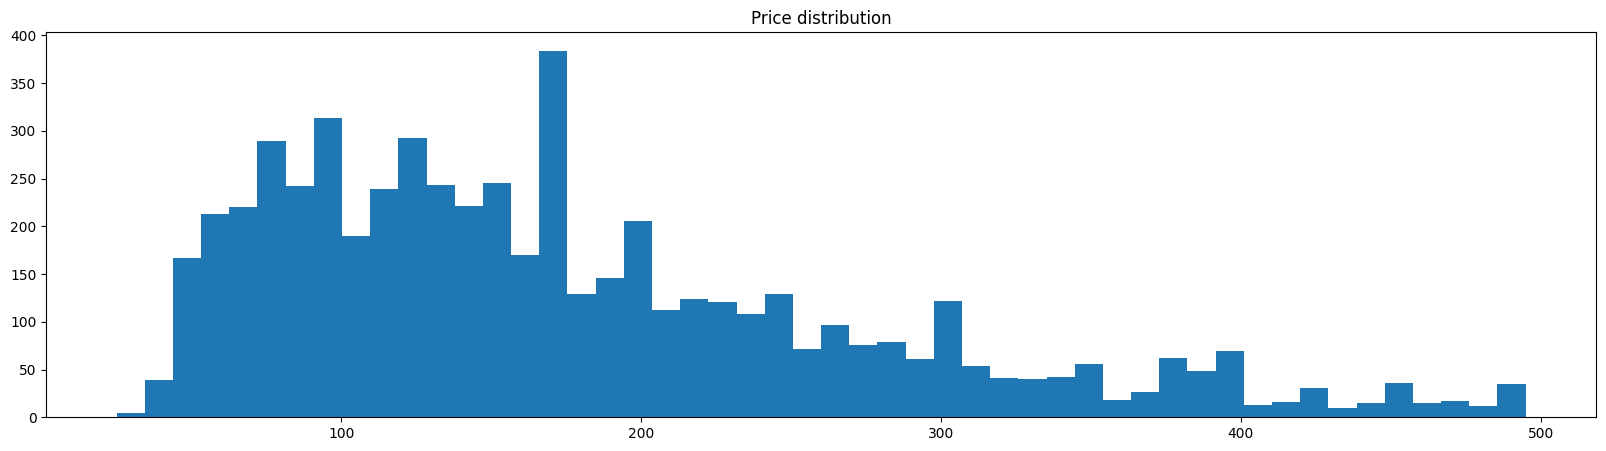

In [ ]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

# **3. Diseño y desarrollo de la estrategia de recomendacion **

In [74]:
selected=total
print("inicial:",selected.shape)

selected=total[ total["price"]<=1200000]
print("price:",selected.shape)
selected=selected[ selected["accepts_mercadopago"]==True]
print("mercadopago:",selected.shape)
selected=selected[ selected["installments_quantity"]>0]
print("installments_quantity:",selected.shape)
selected=selected[ selected["seller_reputation_level_id"]=="5_green"]
print("reputation:",selected.shape)
selected=selected[ selected["official_store_id"].notna()]
print("official_store:",selected.shape)
selected=selected[ selected["warranty"].notna()]
print("warranty:",selected.shape)
selected=selected[ selected["address_state"]=="CO-DC"]
print("address_state:",selected.shape)
selected=selected[ selected["condition"]=="new"]
print("condition:",selected.shape)
selected=selected[ selected["free_shipping"]==True]
print("free_shipping:",selected.shape)
#-precio <= 1200000 (items price)
#-preferible a cuotas (non_mercado_pago_payment_methods)
#-marca, color, tamano de pantalla ideal para mama.
#-preferible tienda oficial (official_store_id)
#-garantia >= 6 meses (items warranty)
#-envio gratis. (shipping)

#-alrededores de bogota. (seller address)
#-vendedor con buena reputacion.  (seller reputation)


price: (680, 21)
mercadopago: (680, 21)
installments_quantity: (680, 21)
reputation: (637, 21)
official_store: (56, 21)
warranty: (54, 21)
address_state: (9, 21)
condition: (9, 21)
free_shipping: (9, 21)


**Atributo 2 Disponibilidad (availability_365) - Analisis medidas de tendencia central y distribucion:**



In [ ]:
listings_df["availability_365"] = listings_df["availability_365"].astype(float)
listings_df["availability_365"].describe(percentiles=[0.25, 0.5, 0.75])

,availability_365
count,7888.000000
mean,172.637551
std,127.849030
min,0.000000
25%,51.000000
50%,165.000000
75%,294.000000
max,365.000000


[]

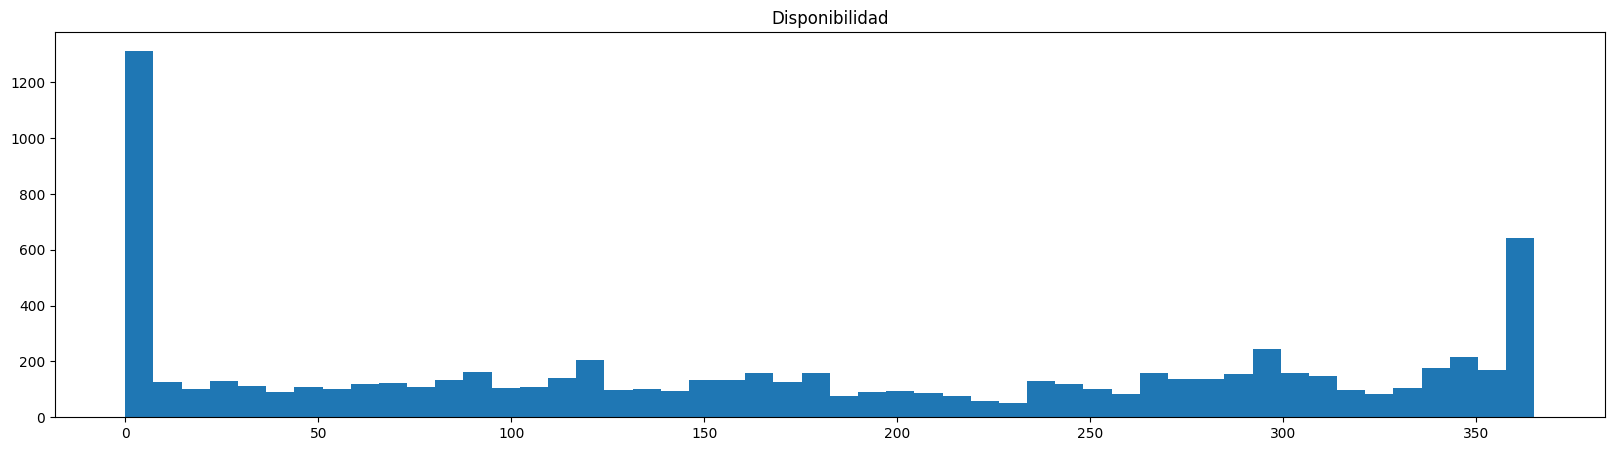

In [ ]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["availability_365"] <= (q3 + 1.5 * iqr)]["availability_365"], bins=50)
plt.title("Disponibilidad")
plt.plot()

**Atributo 3 Sectores (neighbourhood_cleansed) - Analisis medidas de tendencia central y distribucion:**

In [ ]:
listings_df["neighbourhood_cleansed"].value_counts(dropna=False, normalize=True)

,proportion
neighbourhood_cleansed,
Downtown/Civic Center,0.153144
Mission,0.080502
South of Market,0.070740
Western Addition,0.063641
Nob Hill,0.050837
Outer Sunset,0.045512
Bernal Heights,0.041836
Castro/Upper Market,0.036511
Haight Ashbury,0.034736


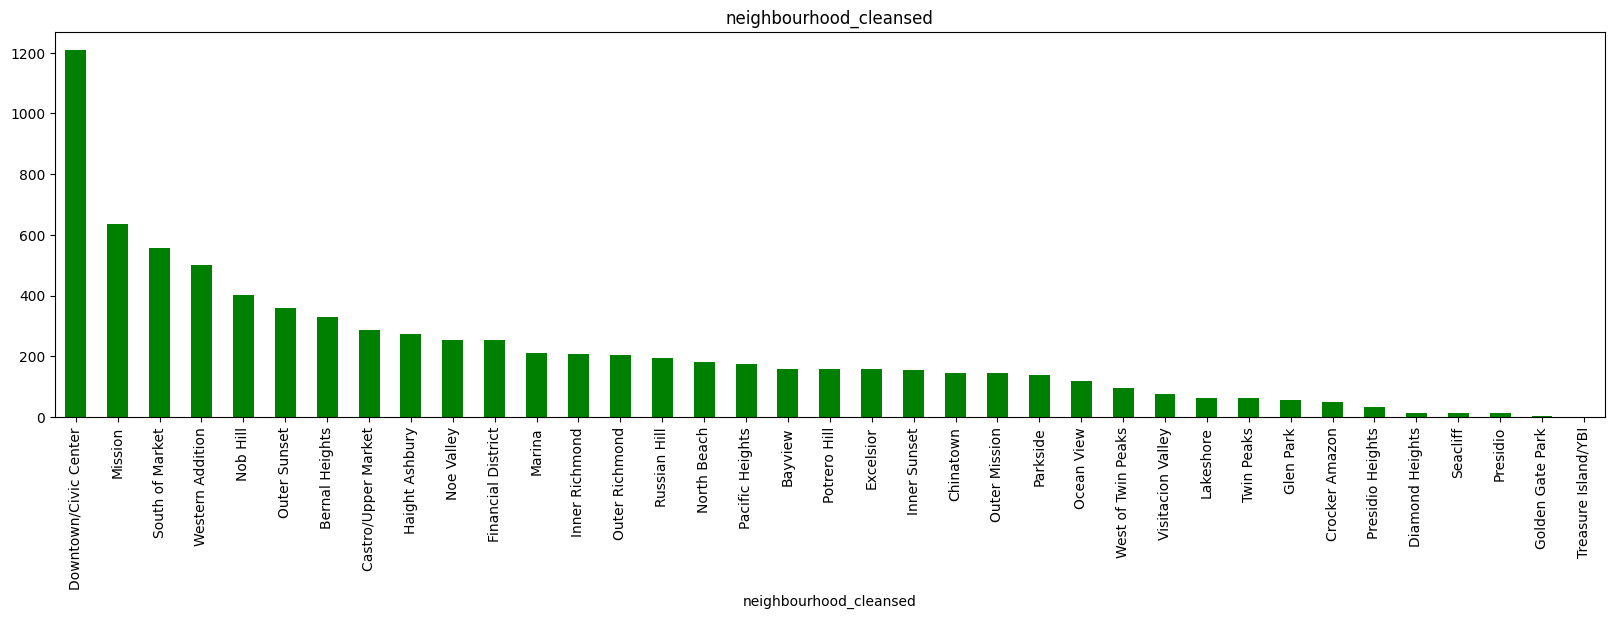

In [ ]:
fig, (ax1) = plt.subplots(1, sharey=True, figsize=(20, 5))
listings_df["neighbourhood_cleansed"].value_counts().plot(kind="bar", ax=ax1, color="green")
ax1.set_title("neighbourhood_cleansed")
plt.show()

**Atributo 4  Review Score Values - Analisis medidas de tendencia central y distribucion:**

In [ ]:
listings_df["review_scores_value"] = listings_df["review_scores_value"].astype(float)
listings_df["review_scores_value"].describe(percentiles=[0.25, 0.5, 0.75])

,review_scores_value
count,6077.00
mean,4.68
std,0.43
min,0.00
25%,4.60
50%,4.78
75%,4.90
max,5.00


[]

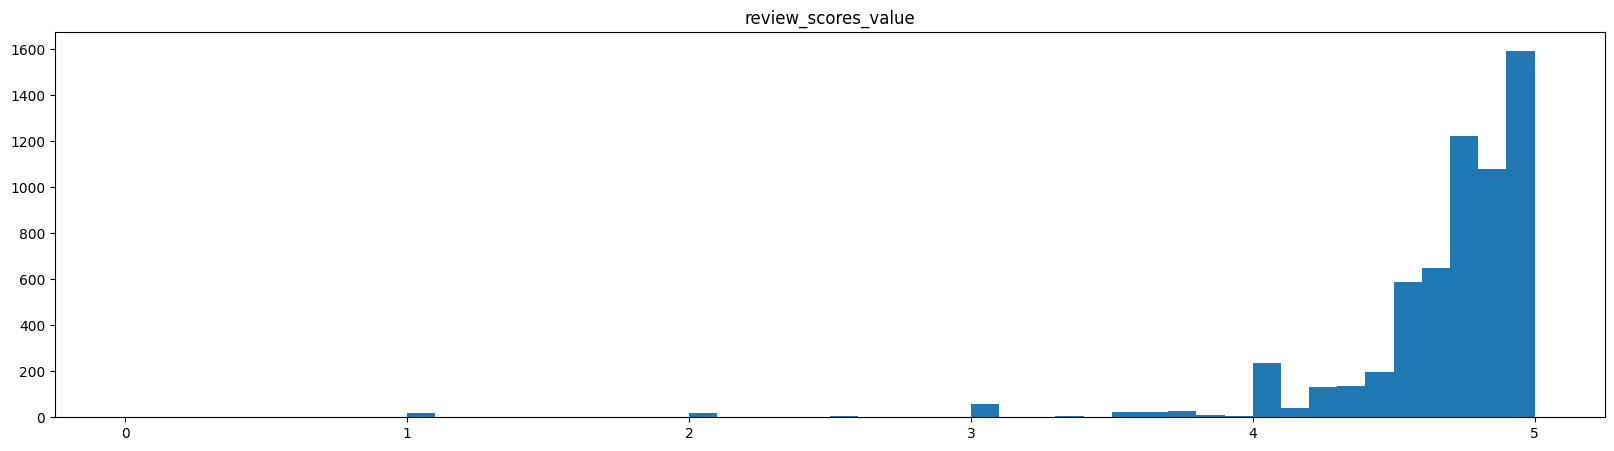

In [ ]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["review_scores_value"] <= (q3 + 1.5 * iqr)]["review_scores_value"], bins=50)
plt.title("review_scores_value")
plt.plot()

# **3. Estrategia de Analisis**


Encontrar los vecindarios mas rentables para inversión inmobiliaria en San Francisco, inicialmente identificando las correlaciones del precio, posteriormente se calculará la rentabilidad (entendida como ocupación por precio) en los vecindarios mas representativos, para ello se identificará la concentración de la oferta de propiedades basados en un análisis de Pareto, luego se calculará la ocupación de las propiedades a partir de la disponibilidad (365-availability_365), para entender el comportamiento del precio y la ocupación nos apoyaremos en graficas de distribución de estas dos variables y posteriormente definiremos la técnica estadística mas apropiada para analizar la rentabilidad como producto del precio y la ocupación.


# **4. Desarrollo de la Estrategia**

In [ ]:
# Extraccion de la muestra aleatoria dado el tamaño del dataset
listings_sample_df =  listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].sample(frac=0.1)
listings_sample_df.shape

(571, 76)

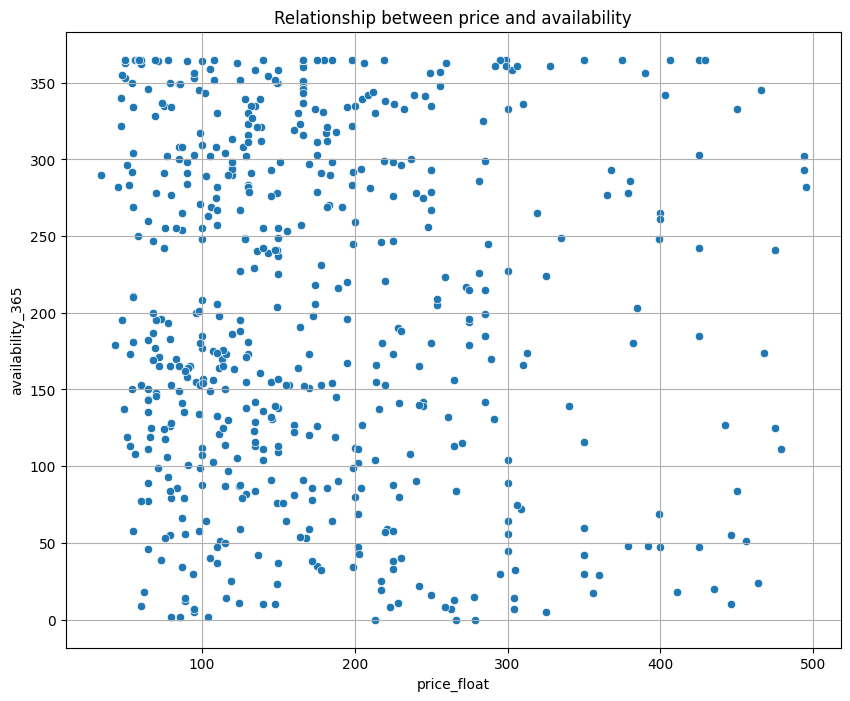

In [ ]:
# Identificando correlacion entre el precio y la disponibilidad
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=listings_sample_df["price_float"],
    y=listings_sample_df["availability_365"]
)
plt.title("Relationship between price and availability")
plt.grid()
plt.show()

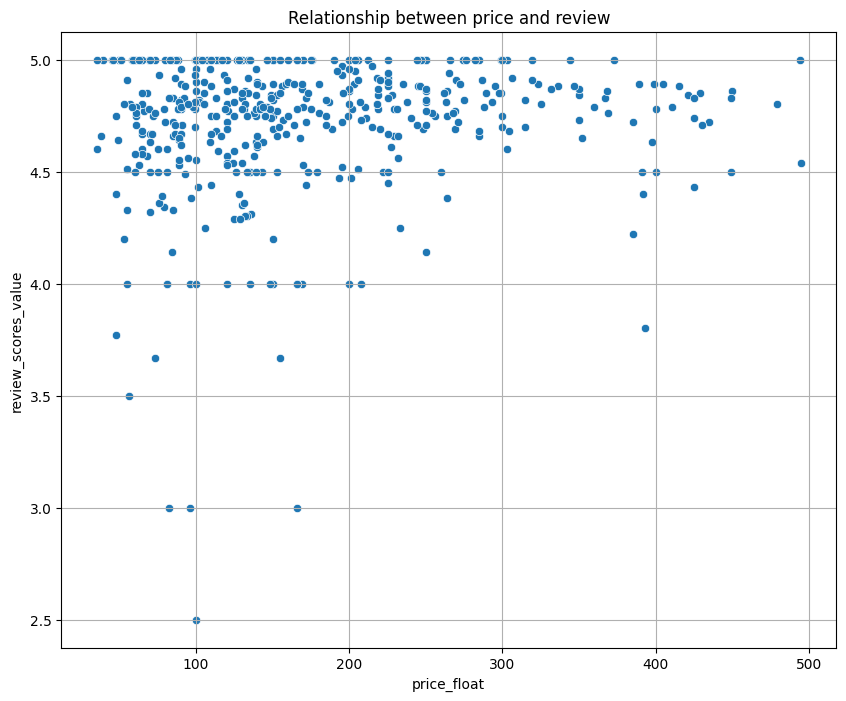

In [ ]:
# Identificando correlacion entre el precio y la calificacion dada por el cliente
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=listings_sample_df["price_float"],
    y=listings_sample_df["review_scores_value"]
)
plt.title("Relationship between price and review")
plt.grid()
plt.show()

In [ ]:
##Identificando los vecindarios con mayor oferta
#Sumarizando la frecuencia de oferta de cada vecindario
neighbourhood_frec_cumsum = listings_df["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()

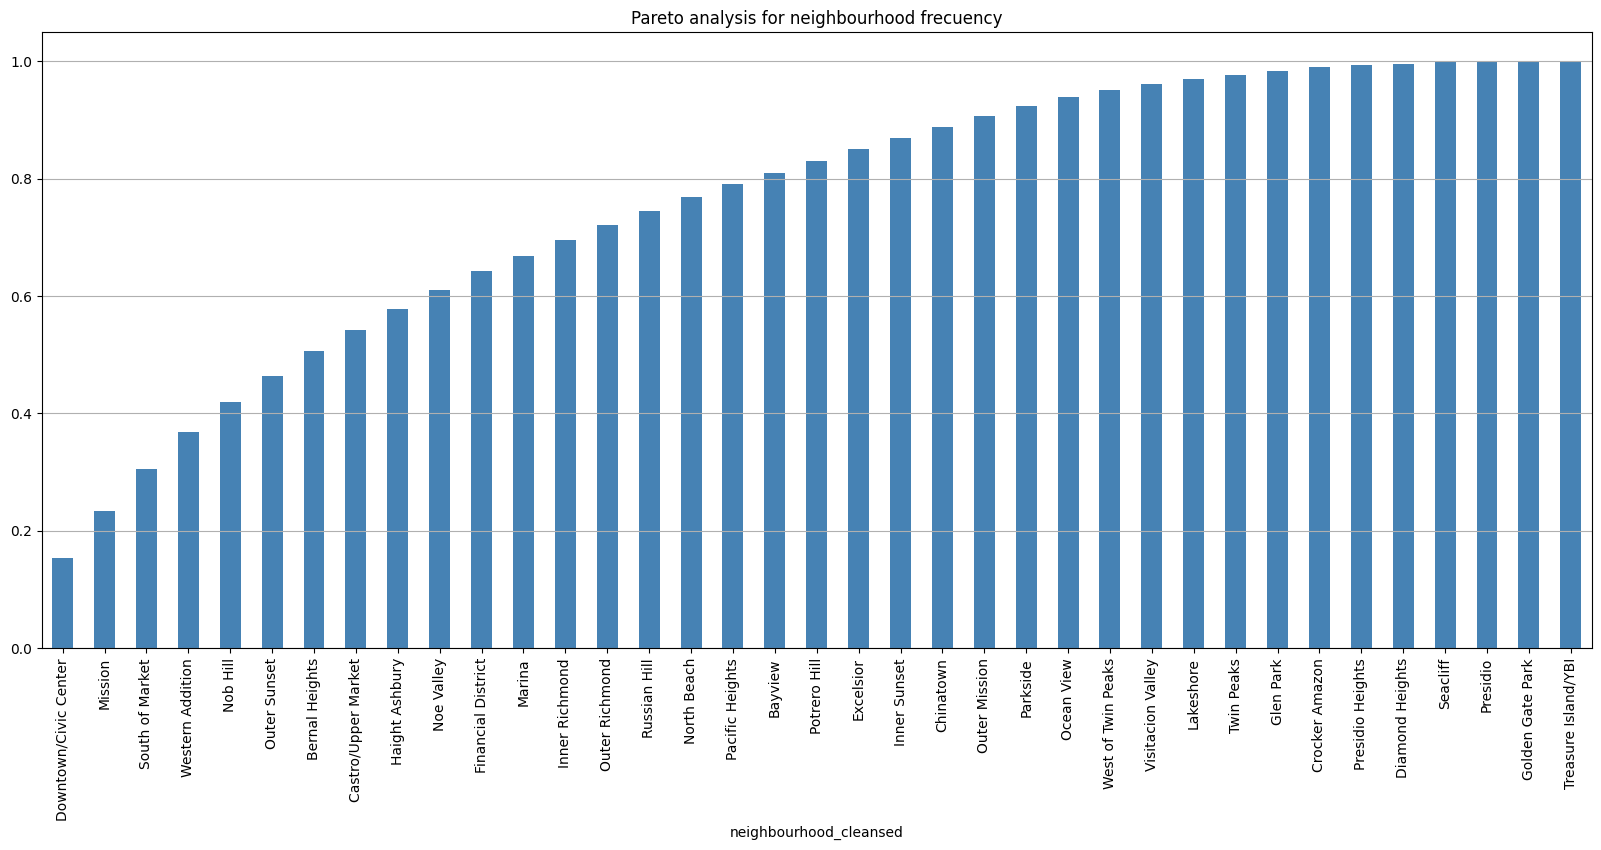

In [ ]:
# Plotting pareto analysis for neighbourhood frecuency
plt.figure(figsize=(20, 8))
neighbourhood_frec_cumsum.plot(kind="bar", color="steelblue")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()

In [ ]:
#Listando los vecindarios mas representivos (los que representan el 80% de la oferta)
most_representative_neighbourhoods = neighbourhood_frec_cumsum.loc[neighbourhood_frec_cumsum < 0.8].index.tolist()
most_representative_neighbourhoods

['Downtown/Civic Center',
 'Mission',
 'South of Market',
 'Western Addition',
 'Nob Hill',
 'Outer Sunset',
 'Bernal Heights',
 'Castro/Upper Market',
 'Haight Ashbury',
 'Noe Valley',
 'Financial District',
 'Marina',
 'Inner Richmond',
 'Outer Richmond',
 'Russian Hill',
 'North Beach',
 'Pacific Heights']

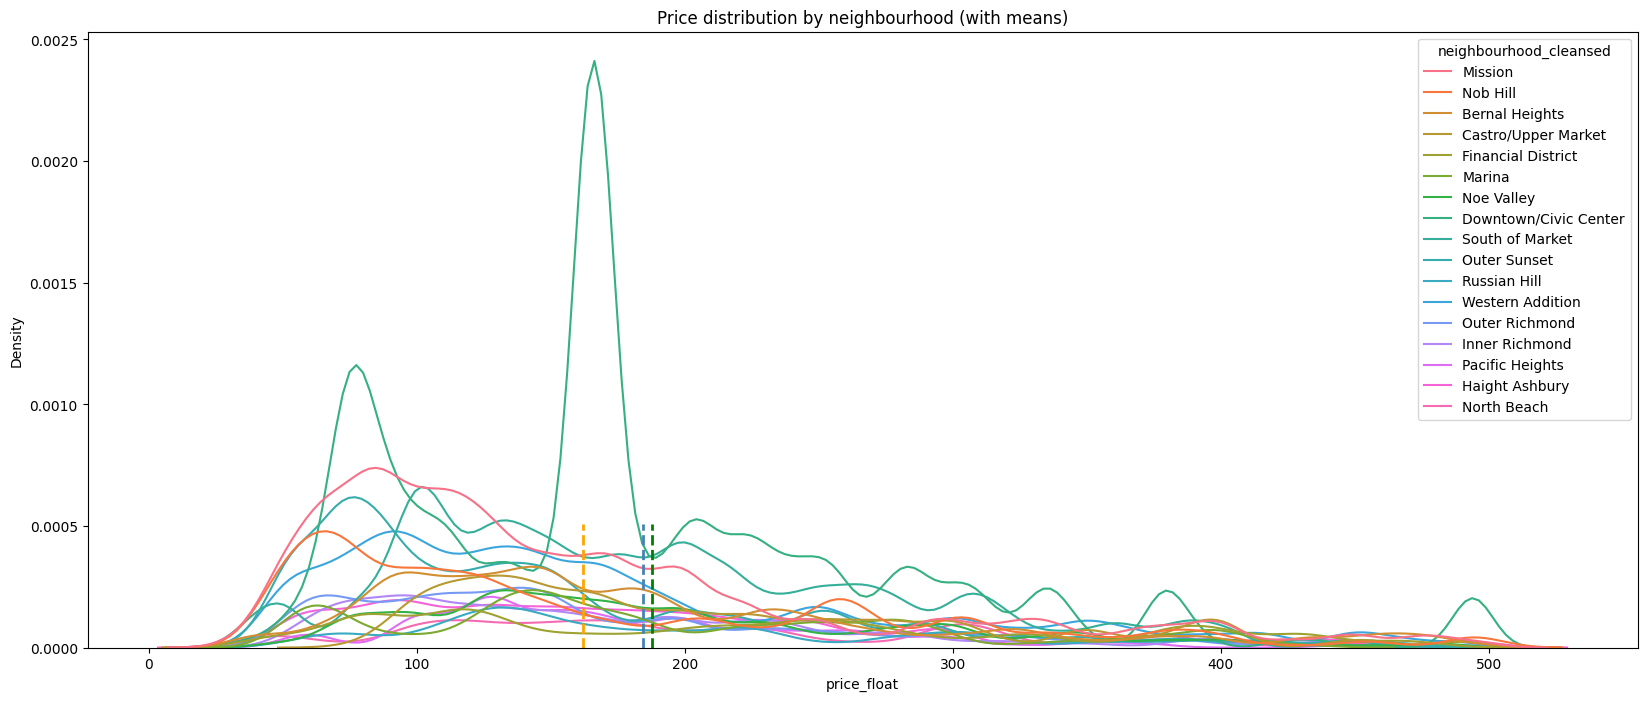

In [ ]:
# Distribucion del precio por noche en los vecindarios mas representativos
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="price_float",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "price_float"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.show()

In [ ]:
#Calculamos la ocupacion con base en la disponibilidad (availability_365)
listings_df["ocupacion"] = 365 - listings_df["availability_365"].astype(float)

In [ ]:
listings_df["ocupacion"].describe(percentiles=[0.25, 0.5, 0.75])

,ocupacion
count,7888.00
mean,192.36
std,127.85
min,0.00
25%,71.00
50%,200.00
75%,314.00
max,365.00


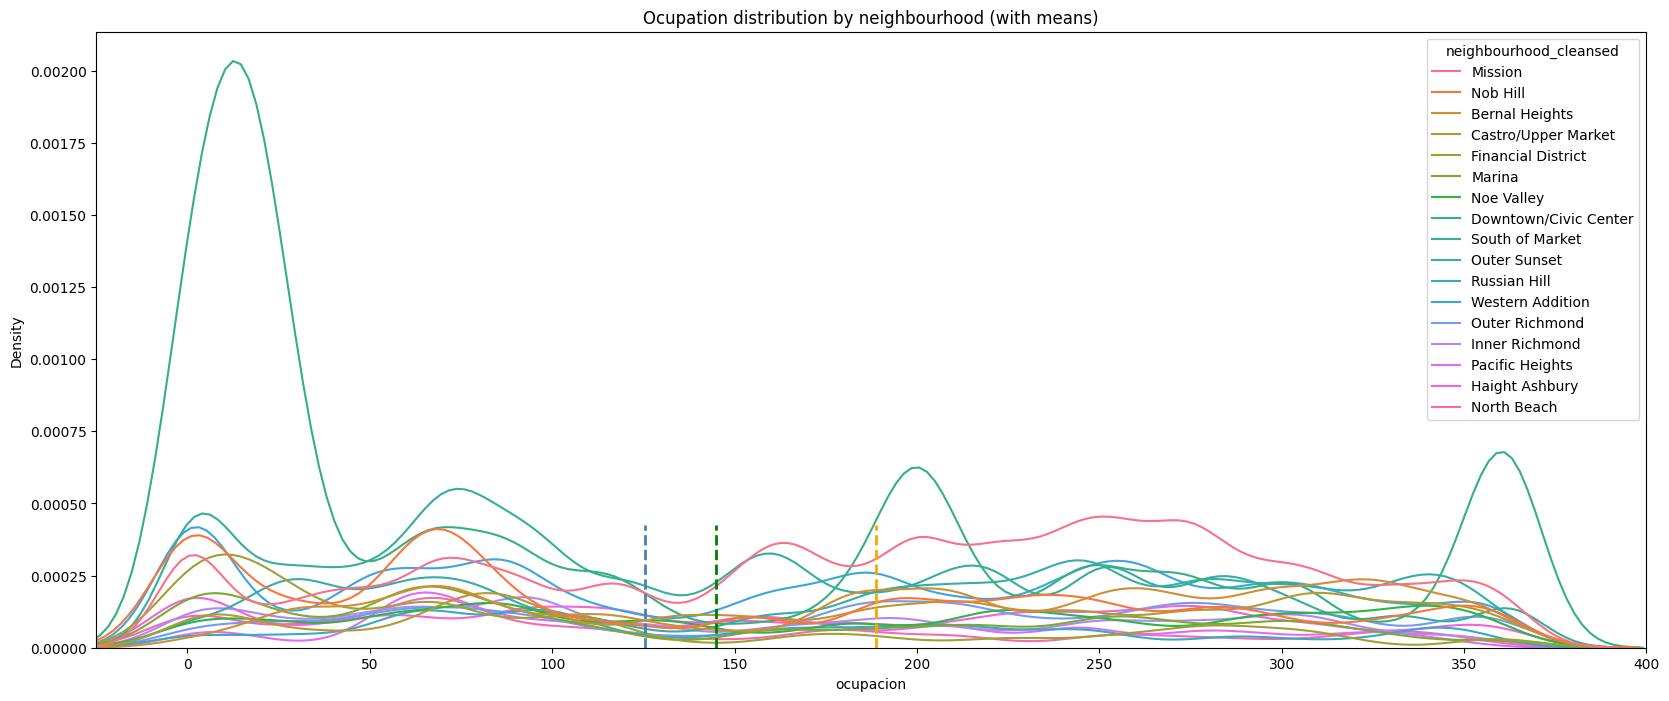

In [ ]:
# Distribucion de la ocupacion en los vecindarios mas representativos
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="ocupacion",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "ocupacion"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Ocupation distribution by neighbourhood (with means)")
plt.xlim([-25, 400])
plt.show()

In [ ]:
#Nuevo dataset filtrado con los vecindarios mas representativos
listings_most_representative_df = listings_df[listings_df['neighbourhood_cleansed'].isin(most_representative_neighbourhoods)]
listings_most_representative_df.shape

(6233, 77)

In [ ]:
#Calcula una nueva columna con la RENTABILIDAD basado en la ocupacion y el precio
listings_most_representative_df.loc[:, "rentability"] = listings_most_representative_df["ocupacion"] * listings_most_representative_df["price_float"]


<ipython-input-29-109c41f7a615>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_most_representative_df.loc[:, "rentability"] = listings_most_representative_df["ocupacion"] * listings_most_representative_df["price_float"]


In [ ]:
#Genera una caracterizacion de la variable rentabilidad
listings_most_representative_df["rentability"] = listings_most_representative_df["rentability"].astype(float)
listings_most_representative_df['rentability'].describe([0.25, 0.5, 0.75, 0.95]).apply(lambda x: format(x, 'f'))

<ipython-input-79-6ab0ec2b66d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_most_representative_df["rentability"] = listings_most_representative_df["rentability"].astype(float)


,rentability
count,4839.000000
mean,41017.501757
std,91123.202183
min,0.000000
25%,7968.000000
50%,21000.000000
75%,46162.500000
95%,127200.000000
max,2016465.000000


### Teniendo en cuenta que la dispersion de la rentabilidad en los vecindarios mas representativos es alta, realizaremos un analisis de variablidad con el rango intercuartilico para identificar segmentos de interes para inversion reduciendo el impacto de los outliers.

In [ ]:
# Analisis de variabilidad con el rango intercuartilico
q1_renta = listings_most_representative_df["rentability"].quantile(0.25)
q2_renta = listings_most_representative_df["rentability"].quantile(0.50)
q3_renta = listings_most_representative_df["rentability"].quantile(0.75)
q4_renta = listings_most_representative_df["rentability"].quantile(0.95)
iqr_renta = q3_renta - q1_renta


In [ ]:
# Se identifican los vecindarios que estan dentro del rango intercuartilico del 1 al 3 y se ordena por el promedio de rentabilidad
pd.set_option('display.float_format', '{:.2f}'.format)
data_q1_q3=listings_most_representative_df.loc[(listings_most_representative_df["rentability"] >=(q1_renta))&(listings_most_representative_df["rentability"] <=(q3_renta))]
portafolio_conservador=data_q1_q3.groupby(["neighbourhood_cleansed"])["rentability"].agg(["count", "mean"]).reset_index().sort_values(by="mean", ascending=False)
portafolio_conservador

,neighbourhood_cleansed,count,mean
1,Castro/Upper Market,114,27073.86
0,Bernal Heights,164,25281.51
12,Outer Sunset,184,25134.53
9,Noe Valley,105,24689.30
5,Inner Richmond,85,24497.76
6,Marina,76,23607.89
13,Pacific Heights,80,23427.45
11,Outer Richmond,106,23237.81
4,Haight Ashbury,98,22815.90
16,Western Addition,201,22767.80


In [ ]:
# Se identifican los vecindarios que estan dentro del rango intercuartilico del 2 al 4 y se ordena por el promedio de rentabilidad
pd.set_option('display.float_format', '{:.2f}'.format)
data_q2_q4=listings_most_representative_df.loc[(listings_most_representative_df["rentability"] >=(q2_renta))&(listings_most_representative_df["rentability"] <=(q4_renta))]
portafolio_medio=data_q2_q4.groupby(["neighbourhood_cleansed"])["rentability"].agg(["sum","count", "mean"]).reset_index().sort_values(by="mean", ascending=False)
portafolio_medio

,neighbourhood_cleansed,sum,count,mean
10,North Beach,2674281.00,44,60779.11
6,Marina,4664405.00,81,57585.25
14,Russian Hill,3627016.00,64,56672.12
1,Castro/Upper Market,8642737.00,156,55402.16
8,Nob Hill,6048804.00,112,54007.18
9,Noe Valley,5820334.00,110,52912.13
16,Western Addition,9596387.00,182,52727.40
3,Financial District,2175469.00,42,51796.88
11,Outer Richmond,5157140.00,100,51571.40
13,Pacific Heights,3568306.00,70,50975.80


## **Insights**



*   De acuerdo a las graficas de correlación del precio con respecto a la disponibilidad y la calificación dada por el cliente, no existe correlación entre estas variables.
*   La oferta de propiedades para renta en San Francisco se concentra en 16 vecindarios y la mas representativa es Downtown/Civic Center con el 15%.
*   La propiedades en San Francisco tienen una mediana de ocupación de 200 días, sin embargo tambien se evidencia una alta concentración de propiedades con una ocupación menor a 50 días.
*   El precio por dia de las propiedades tiene una mediana de 166 dolares por dia.
*   En el grafico de precio por vecindario, se evidencia que los huéspedes tienden a pagar menos de 100 dolares por noche o menos de 200.
*   La propiedad mas rentable de los vecindarios ubicados en los rangos intercuartílicos q1 al q3 es de 27.073 dólares con un precio promedio por dia de 74 dólares, el cual esta por debajo de la media del precio por dia del mercado, razón por la cual este escenario no será considerado como propuesta de inversión.
*   La propiedad mas rentable de los vecindarios ubicados en los rangos intercuartílicos q2 al q4 es de 60.779 dólares con un precio promedio por dia de 166 dólares, el cual esta alineado con la media del precio por dia del mercado, razon por la cual, este escenario y los dos siguientes seran considerados como propuesta de inversión.











# **5. Generacion de Resultados**

En San Francisco el mercado de renta de propiedades mediante la plataforma airbnb se concentra en 16 vecindarios, estas propiedades tienen una ocupacion promedio al año de 200 dias y un costo promedio de 166 dolares por dia.

Los vecindarios mas rentables para invertir, manteniendo un precio por noche competitivo con respecto al mercado son: North Beach, Marina y
Russian Hill.

El vecindario North Beach tiene un ingreso promedio anual de 60.779 dolares con un precio promedio por noche de 166 dolares que corresponde a la media de precio por noche del mercado (166 dolares).

El vecindario Marina tiene un ingreso promedio anual de 57.585 dolares con un precio promedio por noche de 157 dolares cercano a la media de precio por noche del mercado (166 dolares).

El vecindario Russian Hill tiene un ingreso promedio anual de 56.672 dolares con un precio promedio por noche de 155 dolares cercano a la media de precio por noche del mercado (166 dolares).



